<img width="600px" src="https://www.urp.edu.pe/img/thumbnails/wm/745/hm/243/we/745/he/243/x/0/y/0/s/0/q/60/zc/3/f/0/rgb/000000/src/28042/n/picture3.png"></img>
# <font color='Darkorange'>Unidad de Posgrado - Maestría en Ciencia de los datos</font></span>
## <font color='Steelblue'> Matemática Aplicada a la Ciencia de Datos - Prof: Mg. Carlos Deudor Gomez </font></span>
## Alumno: **Jaramillo - Rojas - Leandra Marcela**
---
----

**1. Ejercicio:**

Un ejecutivo no llega a una junta importante y no contesta las llamadas, pero tiene activado un dispositivo GPS, para saber si esta en camino los directivos de su empresa activan su localizador obteniendo los siguientes datos:

<div style="text-align: center;">
    <img src="Imagen1.png" alt="Logo personal" style="width:50%;">
</div>

**Respuesta:**

Ingrese las posiciones de los satélites (x, y, z) en un solo bloque, separadas por espacio. Ejemplo: 1 2 3 4 5 6 7 8 9


Ingrese las posiciones de los satélites para los 3 satélites (9 valores en total):  0.539902 2.19469 0.515066 2.45447 0.975447 0.980592 1.85353 1.17735 1.9077


Ingrese los tiempos de los satélites (t1, t2, t3), separados por espacio: 


 5.57658 5.60392 5.58193
Ingrese la velocidad de la señal:  4.7



Ubicación: x = 0.8085090824054435, y = 0.22307261554678634, z = 0.5445656672659859, tiempo t = 5.999994716406494


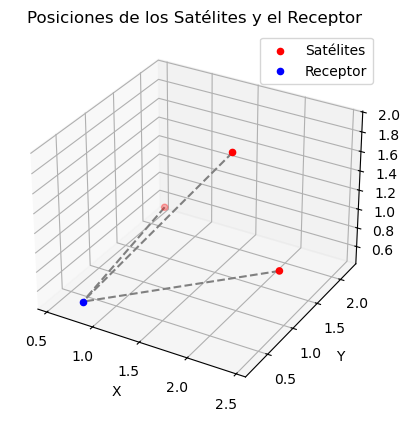

In [4]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función que representa el sistema de ecuaciones
def equations(vars, satellites, times, v):
    x, y, z, t = vars
    eqs = []
    # Ecuaciones de distancia de los 3 satélites
    for i in range(3):
        xi, yi, zi = satellites[i]
        ti = times[i]
        eqs.append(np.sqrt((x - xi)**2 + (y - yi)**2 + (z - zi)**2) - v * (t - ti))
    
    # Restricción adicional de que el punto está sobre la superficie terrestre
    eqs.append(x**2 + y**2 + z**2 - 1)
    
    return eqs

# Función para pedir datos al usuario en un solo bloque
def pedir_datos():
    print("Ingrese las posiciones de los satélites (x, y, z) en un solo bloque, separadas por espacio. Ejemplo: 1 2 3 4 5 6 7 8 9")
    datos_satellites = input("Ingrese las posiciones de los satélites para los 3 satélites (9 valores en total): ")
    
    # Convertir la entrada a una lista de números
    posiciones = list(map(float, datos_satellites.split()))
    
    # Dividir las posiciones en tres grupos (uno por satélite)
    satellites = [posiciones[i:i+3] for i in range(0, len(posiciones), 3)]
    
    print("Ingrese los tiempos de los satélites (t1, t2, t3), separados por espacio: ")
    datos_times = input()
    
    # Convertir los tiempos a una lista de números
    times = list(map(float, datos_times.split()))
    
    v = float(input("Ingrese la velocidad de la señal: "))
    
    return np.array(satellites), np.array(times), v

# Función para graficar las posiciones en 3D
def graficar(satellites, receptor):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los satélites
    ax.scatter(satellites[:, 0], satellites[:, 1], satellites[:, 2], color='r', label='Satélites')

    # Graficar la posición del receptor
    ax.scatter(receptor[0], receptor[1], receptor[2], color='b', label='Receptor')

    # Conectar los satélites con el receptor
    for sat in satellites:
        ax.plot([sat[0], receptor[0]], [sat[1], receptor[1]], [sat[2], receptor[2]], 'gray', linestyle='--')

    # Etiquetas y título
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Posiciones de los Satélites y el Receptor')

    # Mostrar leyenda
    ax.legend()

    # Mostrar gráfico
    plt.show()

# Programa principal
if __name__ == "__main__":
    # Pedir los datos del usuario
    satellites, times, v = pedir_datos()
    
    # Ajustar valores iniciales según el contexto del problema
    initial_guess = [1, 1, 1, 0.6]  # Puedes ajustar estos valores
    
    # Resolver el sistema de ecuaciones con mayor tolerancia
    solution = fsolve(equations, initial_guess, args=(satellites, times, v), xtol=1e-6, maxfev=10000)
    
    # Extraer los resultados
    x, y, z, t = solution
    print(f"\nUbicación: x = {x}, y = {y}, z = {z}, tiempo t = {t}")
    
    # Graficar las posiciones en 3D
    graficar(satellites, [x, y, z])

**Respuesta: La ubicación del ejecutivo según el GPS es: Ubicación: x = 0.8085090824054435, y = 0.22307261554678634, z = 0.5445656672659859, tiempo t = 5.999994716406494**